# Choosing a classification algorithm

When applying a classifier it is important to consider the problem at hand. There is always a balance to be considered between ***computational performance*** and ***predicitve performance***. The five main steps in training a supervised machine learning model are:

1. Selecting features and collecting labeled training examples.

2. Choosing a performance metric

3. Choosing a learning algorithm and training a model

4. Evaluating the performance of a model

5. Changing the settings of the algortihm and tuning the model.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

print("Class labels: ", np.unique(y))

Class labels:  [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
# stratify ensures that training and test sets contain the same proportion of class labels as the input dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print("Label counts in y: ", np.bincount(y))
print("Label counts in y_train: ", np.bincount(y_train))
print("Label counts in y_test: ", np.bincount(y_test))

Label counts in y:  [50 50 50]
Label counts in y_train:  [35 35 35]
Label counts in y_test:  [15 15 15]


#### Standardizing using SciKit-Learn
scikit-learn's preprocessing model allows us to feature scale to optimize algorithmic performance


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Training the dataset
Using scikit-learn's built in Perceptron model we can do multiclass classification by OvR (one-vs-rest) method such that we can feed all three classes at once

In [15]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.01, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 2


In [16]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Accuracy: {ppn.score(X_test_std, y_test)}")

Accuracy: 0.9555555555555556
Accuracy: 0.9555555555555556


In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
    markers = ('o','s','<', '>')
    colors = ('r', 'b', 'g', 'y')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,1].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min,x2_max,resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.25, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[ y == cl, 1],
                    alpha = .8,
                    c=colors[idx],
                    marker=markers[idx],
                    label = f"Class {cl}",
                    edgecolors='black')
    
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1],
                    c='none', 
                    edgecolors='black',
                    alpha=0.5,
                    linewidth=1,
                    marker = 'o',
                    s=100,
                    label = 'test set')


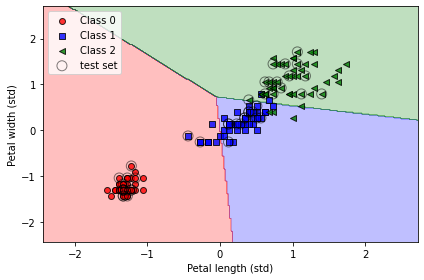

In [18]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))

plt.xlabel('Petal length (std)')
plt.ylabel('Petal width (std)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Activation function $\sigma (z) =$ $\frac{1}{1+ e^{-z}}$

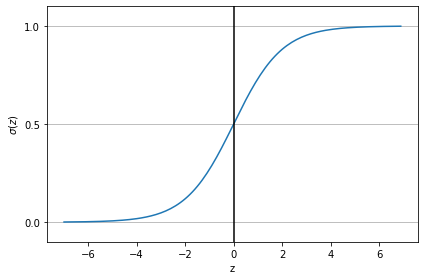

In [19]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
sigma_z = sigmoid(z)
plt.plot(z,sigma_z)
plt.axvline(0.0, color ='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

Loss function $L(w,b) = -\frac{1}{n} \sum_{i=1}^{n}  y^{i}(\sigma(z^{i})) + (1 - y^{i})(1 - \sigma(z^{i}))$ 
  
  $\Rightarrow L(w,b)^{(i)} = log(\sigma(z)) \text{, if } y = 1 \\ L(w,b)^{(i)} = -log(1 - \sigma(1-z)), \text{ if y = 0}$

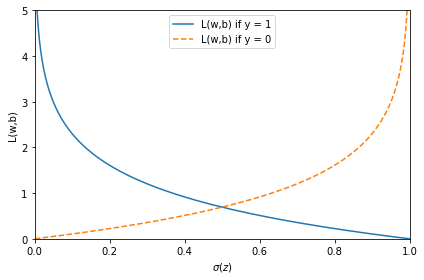

In [20]:
def loss_1(z):
    return -np.log(sigmoid(z))
def loss_2(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-7,7,0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(z_i) for z_i in z]
c2 = [loss_2(z_i) for z_i in z]

plt.plot(sigma_z,c1, label = 'L(w,b) if y = 1')
plt.plot(sigma_z,c2, linestyle='--', label = 'L(w,b) if y = 0')

plt.ylim(0,5)
plt.xlim([0,1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w,b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [21]:
import log_reg as lrg

#### Logisitic Regression Gradient Descent From Class Implementation

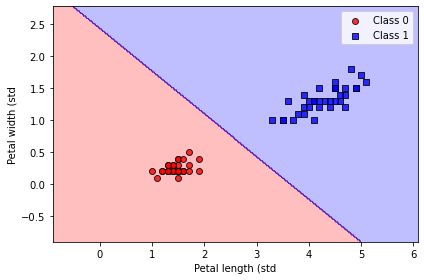

In [22]:
X_train_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_subset = y_train[(y_train == 0) | (y_train == 1)]
logistic_reg_gradient_descent = lrg.LogisticRegressionGD(h=0.2, n_iter=1000)
logistic_reg_gradient_descent.fit(X=X_train_subset, y=y_train_subset)

plot_decision_regions(X=X_train_subset, y=y_train_subset, classifier=logistic_reg_gradient_descent)
plt.xlabel('Petal length (std')
plt.ylabel('Petal width (std')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### SciKit-Learn implementation

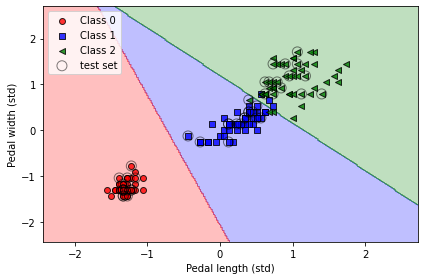

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))

plt.xlabel('Pedal length (std)')
plt.ylabel('Pedal width (std)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
# predicting several flowers
print(lr.predict_proba(X_test_std[:5,:]).argmax(axis=1))
print(lr.predict(X_test_std[:5,:]))

[2 0 0 1 1]
[2 0 0 1 1]


In [37]:
# predicting one flower - note that we must reshape as scikit-learn expects a two-dimensional array
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

#### Tackling overfitting via regularization

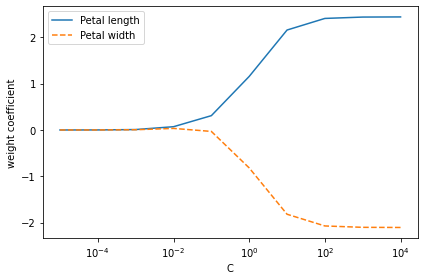

In [41]:
weights, params = [], []

for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:,0], label= 'Petal length')
plt.plot(params, weights[:,1], label = 'Petal width', linestyle='--')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

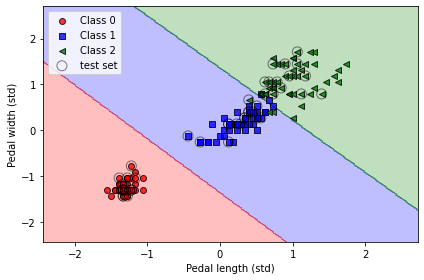

In [42]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('Pedal length (std)')
plt.ylabel('Pedal width (std)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


#### Kernel methods for linearly inseperable data

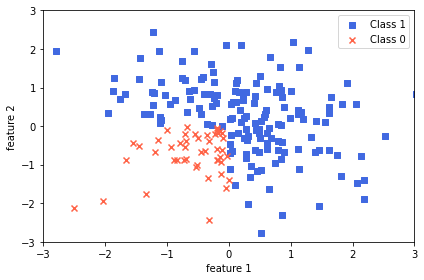

In [47]:
np.random.seed(1)

X_xor = np.random.randn(200,2)

y_xor = np.logical_or(X_xor[:,0] > 0,
                      X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0], 
            X_xor[y_xor == 1, 1], 
            c='royalblue',
            marker='s',
            label = 'Class 1')
plt.scatter(X_xor[y_xor == 0, 0], 
            X_xor[y_xor == 0, 1], 
            c='tomato',
            marker='x',
            label = 'Class 0')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The gamma parameter is a cut-off parameter for the Gaussian sphere. If we increase the value for gamma, we increase the influence or reach of the training examples. This leads to a tighter and bumpier decision boundary. See below how it influences the decision boundary of the algorithm.

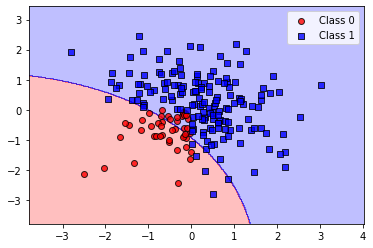

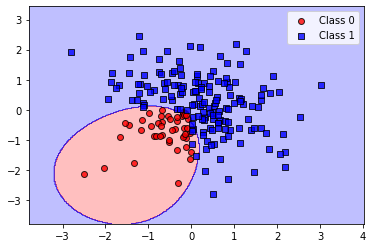

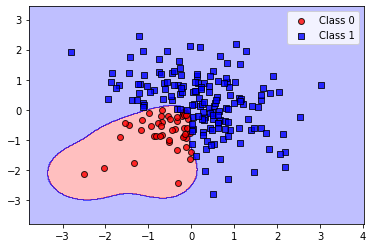

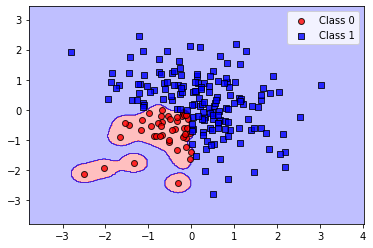

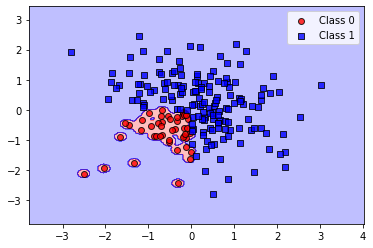

In [54]:
for gamma in [0.01, 0.1, 1, 10, 50]:
    svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=10)
    svm.fit(X_xor, y_xor)
    plot_decision_regions(X_xor, y_xor, classifier=svm)
    plt.legend(loc='best')
    plt.show()

### Decision Tree Learning
Maximizing the information gain (IG) through impurity measures 

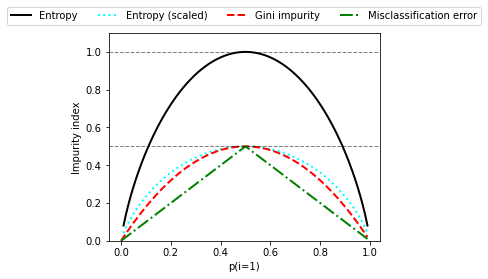

In [60]:
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

def gini(p):
    return p*(1-p) + (1-p)*(1-(1-p))

def error(p):
    return 1 - np.max([p, 1-p])

p = np.arange(0,1,0.01)
ent = [entropy(p_i) if p_i != 0 else None for p_i in p]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in p]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent, sc_ent, gini(p), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini impurity', 'Misclassification error'],
                         ['-', ':', '--', '-.'],
                         ['black', 'cyan', 'red', 'green']):
    line = ax.plot(p,i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--', alpha =0.5)
ax.axhline(y=1, linewidth=1, color='k', linestyle='--', alpha =0.5)

plt.ylim([0,1.1])
plt.ylabel('Impurity index')
plt.xlabel('p(i=1)')
plt.tight_layout()
plt.show()

#### Building a decision tree

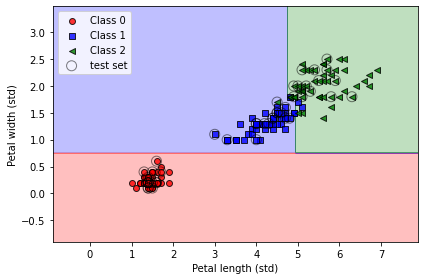

In [74]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105,150))

plt.xlabel('Petal length (std)')
plt.ylabel('Petal width (std)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

[Text(0.25, 0.9, 'Sepal width <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.375, 0.7, 'Sepal length <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.5, 'Sepal width <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.25, 0.3, 'Sepal length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.3, 'Sepal length <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

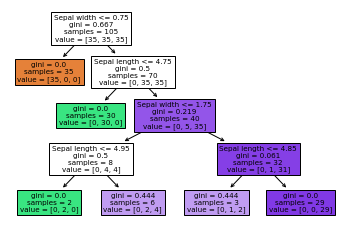

In [75]:
# visualize the tree
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names = feature_names, filled=True)

#### Random Forests
Averages multiple high variance decision trees to build a more aggregated model in 4 steps:
1. Draw a random bootstrap sample of size n  

2. Grow a decision tree from the bootstrap sample  
    a) Randomly select d features without replacement  
    b) Split the node using the feature that provides the best split according to our objective function (e.g. maximize the information gain)  
    
3. Repeat 1-2k times (k = #trees)  
  
4. Aggregate the prediction by majority voting
 

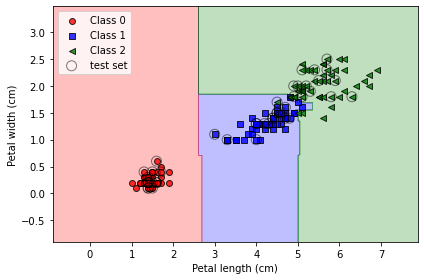

In [85]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=25, criterion="gini" ,random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


 #### K-Nearest Neighbors (Lazy Learning Algorithm)
It is a clustering algorithm that can be summarized by the following steps:  

1. Choose the number of k and a distance metric  
  
2. Find the k-nearest neighbors of the data record that we want to classify  

3. Assign the class label by majority vote

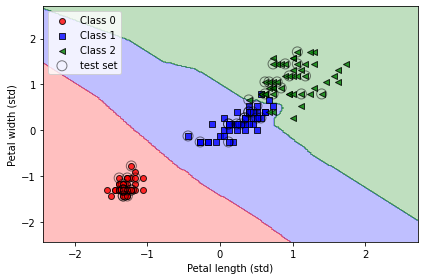

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))

plt.xlabel('Petal length (std)')
plt.ylabel('Petal width (std)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The KNN algorithm is susceptible to overfitting due to the ***curse of dimensionality***, which is the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset (i.e. the closest neigbors become very far away in a high-dimensional feature space to give a good estimate)

## Summary
* Decision trees are particularly attractive if we care about interpretability  

* Logistic regression is a useful online learning tool through SGD (stochastic gradient descent), and allows for predicting an event based on probability  

* SVM are powerful linear models that can be extended to nonlinear models (kernel trick), however they have many parameters that must be tuned for making good predictions  

* Random forests is an ensamble method that do not require much parameter tuning and don't overfit as easily as decision trees making them attractive for various problem domains.  

* KNN classifier offers an alternative approach to classification via lazy learning that allows us to make predictions without any model training. However, the prediction becomes more computationally expensive  

* The most important when choosing an appropriate learning aalgorithm is the available data in our training set. **Informative** and **Discriminatory** features are essential to making good predictions.

